## Own Work Declaration  ——Team 10 Tian Qin, Danyang Zhu, Qingyang wang


### "We declare that all work submitted for final evaluation in this project is our own work and does not involve pla- giarism or collaboration outside of our own team. We also declare that we have not discussed the problems and/or solutions with anyone."

In [ ]:
import json
import pandas as pd
import numpy as np

### note, to run this notebook, please download TSLA.csv and News_Category_Dataset_v2.json into the same folder.
### I have attched these two data into our final submission folder on google drive.


#import news data
news_df = pd.read_json('News_Category_Dataset_v2.json',lines=True)
print(news_df.head())
#only keep those categories. (to be consistent with the procedure on the colab.)
main_cat=['ENTERTAINMENT','BUSINESS','SPORTS','SCIENCE','TECH','POLITICS']

news_df=news_df[news_df['category'].isin(main_cat)]

        category                                           headline  \
0          CRIME  There Were 2 Mass Shootings In Texas Last Week...   
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   

           authors                                               link  \
0  Melissa Jeltsen  https://www.huffingtonpost.com/entry/texas-ama...   
1    Andy McDonald  https://www.huffingtonpost.com/entry/will-smit...   
2       Ron Dicker  https://www.huffingtonpost.com/entry/hugh-gran...   
3       Ron Dicker  https://www.huffingtonpost.com/entry/jim-carre...   
4       Ron Dicker  https://www.huffingtonpost.com/entry/julianna-...   

                                   short_description       date  
0  She left her husband. He killed their children... 2018-05-26  
1 

In [ ]:
news_df['category'][news_df['category']=='SCIENCE'] = 'TECH'

In [ ]:
#category_id mapping
#For reference
category_to_id={'ENTERTAINMENT': 0, 'BUSINESS': 1, 'SPORTS': 2, 'POLITICS': 3,'TECH': 4}
id_to_category={0: 'ENTERTAINMENT', 1: 'BUSINESS', 2: 'SPORTS', 3: 'POLITICS', 4:'TECH'}

In [ ]:
news_df['category_id'] = news_df['category'].map(arg=category_to_id) #get label for each category

In [ ]:
#combine headline and short description

news_df['text'] = news_df.headline + " " + news_df.short_description

In [ ]:
news_df = news_df[(news_df['date'] > '2014-12-31') ] #just for noting, later on, we will focus on data start from 2017

In [ ]:
news_df

,category,headline,authors,link,short_description,date,category_id,text
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,0,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,0,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,0,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,0,Julianna Margulies Uses Donald Trump Poop Bags...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26,0,Morgan Freeman 'Devastated' That Sexual Harass...
...,...,...,...,...,...,...,...,...
102556,POLITICS,Crime and Congress,"Christopher Brauchli, ContributorLawyer",https://www.huffingtonpost.com/entry/crime-and...,Recent events cause the citizen to ask whether...,2015-01-01,3,Crime and Congress Recent events cause the cit...
102564,TECH,Do Carrots Really Help You See Better?,Macrina Cooper-White,https://www.huffingtonpost.com/entry/carrots-s...,,2015-01-01,4,Do Carrots Really Help You See Better?
102566,TECH,Famous 'Blue Hole' May Help Solve Mystery Of M...,Macrina Cooper-White,https://www.huffingtonpost.com/entry/blue-hole...,,2015-01-01,4,Famous 'Blue Hole' May Help Solve Mystery Of M...
102570,POLITICS,New Year Reflections on the US Global Role and...,"David Coates, ContributorWorrell Professor of ...",https://www.huffingtonpost.com/entry/new-year-...,What is it about our contemporary political ro...,2015-01-01,3,New Year Reflections on the US Global Role and...


In [ ]:
import sys
!{sys.executable} -m pip install nltk
#install package for sentimental analysis

In [ ]:
#get sentiment score for text
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

results = []

for headline in news_df['text']:
    pol_score = SIA().polarity_scores(headline) # run analysis
    pol_score['headline'] = headline # add headlines for viewing
    results.append(pol_score)

#results
news_df['Score'] = pd.DataFrame(results)['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\63422\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#label all politics news as 1, others be 0
news_df.loc[news_df.category_id == 3,'label'] =1
news_df.loc[news_df.category_id !=3,'label'] =0

In [ ]:
news_df

,category,headline,authors,link,short_description,date,category_id,text,Score,label
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,0,Will Smith Joins Diplo And Nicky Jam For The 2...,0.3612,0.0
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,0,Hugh Grant Marries For The First Time At Age 5...,0.3412,0.0
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,0,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,0.0000,0.0
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,0,Julianna Margulies Uses Donald Trump Poop Bags...,-0.8591,0.0
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26,0,Morgan Freeman 'Devastated' That Sexual Harass...,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...
102556,POLITICS,Crime and Congress,"Christopher Brauchli, ContributorLawyer",https://www.huffingtonpost.com/entry/crime-and...,Recent events cause the citizen to ask whether...,2015-01-01,3,Crime and Congress Recent events cause the cit...,NaN,1.0
102564,TECH,Do Carrots Really Help You See Better?,Macrina Cooper-White,https://www.huffingtonpost.com/entry/carrots-s...,,2015-01-01,4,Do Carrots Really Help You See Better?,NaN,0.0
102566,TECH,Famous 'Blue Hole' May Help Solve Mystery Of M...,Macrina Cooper-White,https://www.huffingtonpost.com/entry/blue-hole...,,2015-01-01,4,Famous 'Blue Hole' May Help Solve Mystery Of M...,NaN,0.0
102570,POLITICS,New Year Reflections on the US Global Role and...,"David Coates, ContributorWorrell Professor of ...",https://www.huffingtonpost.com/entry/new-year-...,What is it about our contemporary political ro...,2015-01-01,3,New Year Reflections on the US Global Role and...,NaN,1.0


In [ ]:
news_df_total_politics_pd_2 = news_df.groupby(['date','label'])['Score'].sum()
news_df_total_politics_pd_2=news_df_total_politics_pd_2.reset_index()   #get appropriate form of our dataframe

In [ ]:
news_df_total_politics_pd_2

,date,label,Score
0,2015-01-01,0.0,0.0000
1,2015-01-01,1.0,0.0000
2,2015-01-02,0.0,0.0000
3,2015-01-02,1.0,0.0000
4,2015-01-03,0.0,0.0000
...,...,...,...
2475,2018-05-24,1.0,-0.2321
2476,2018-05-25,0.0,-4.2102
2477,2018-05-25,1.0,1.1108
2478,2018-05-26,0.0,0.5750


In [ ]:
#We divide data of news into two sub dataframes: politic news and non-politic news
#Non-politics
news_df_total_politics_pd_2_nonP=news_df_total_politics_pd_2[news_df_total_politics_pd_2['label']==0]
news_df_total_politics_pd_2_nonP=news_df_total_politics_pd_2_nonP.reset_index()

#Politics
news_df_total_politics_pd_2_P=news_df_total_politics_pd_2[news_df_total_politics_pd_2['label']==1]
news_df_total_politics_pd_2_P=news_df_total_politics_pd_2_P.reset_index()

In [ ]:
price_tesla=pd.read_csv('TSLA.csv')

In [ ]:
time_series_price=price_tesla[['Date','Adj Close'] ]
time_series_price['Adj Close']=pd.to_numeric(time_series_price['Adj Close'])
time_series_price['Date']=pd.to_datetime(time_series_price['Date'])
time_series_price['LogPrice'] = np.log(time_series_price['Adj Close'])

<ipython-input-16-416d4fabc8bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_price['Adj Close']=pd.to_numeric(time_series_price['Adj Close'])
<ipython-input-16-416d4fabc8bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_price['Date']=pd.to_datetime(time_series_price['Date'])
<ipython-input-16-416d4fabc8bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
from datetime import datetime
#We only care about price from 2017

time_series_price_2016_2018=time_series_price[(time_series_price['Date']<datetime.strptime('2019-01-01', "%Y-%m-%d"))
                                         &(time_series_price['Date']>datetime.strptime('2016-12-31', "%Y-%m-%d")) ]
time_series_price_2016_2018.head()

,Date,Adj Close,LogPrice
1640,2017-01-03,216.990005,5.379851
1641,2017-01-04,226.990005,5.424906
1642,2017-01-05,226.750000,5.423848
1643,2017-01-06,229.009995,5.433766
1644,2017-01-09,231.279999,5.443629


In [ ]:
news_df_total_politics_pd_2_nonP['Score_macro_nonP']=news_df_total_politics_pd_2_nonP['Score']#.shift(1)
news_df_total_politics_pd_2_P['Score_macro_P']=news_df_total_politics_pd_2_P['Score']#.shift(1)
#convert string to datatime format
news_df_total_politics_pd_2_P['date']=pd.to_datetime(news_df_total_politics_pd_2_P['date'])
news_df_total_politics_pd_2_nonP['date']=pd.to_datetime(news_df_total_politics_pd_2_nonP['date'])

In [ ]:
#Set index by data for each dataframe
time_series_price_2016_2018=time_series_price_2016_2018.set_index('Date')
time_series_price_2016_2018=time_series_price_2016_2018.rename_axis('date')
news_df_total_politics_pd_2_P=news_df_total_politics_pd_2_P.set_index('date')
news_df_total_politics_pd_2_nonP=news_df_total_politics_pd_2_nonP.set_index('date')

In [ ]:
# Use reduce method to merge corresponding data
#by conintegration test, we just add score_macro_P in our combined dataframe
from functools import reduce
dfs=[time_series_price_2016_2018[['LogPrice']],time_series_price_2016_2018[['Adj Close']],news_df_total_politics_pd_2_P[['Score_macro_P']]]
combineddata_total = reduce(lambda df_left,df_right: pd.merge(df_left, df_right,
                                              left_index=True, right_index=True,
                                              how='inner'),
                  dfs)


In [ ]:
combineddata_total.head(5)

,LogPrice,Adj Close,Score_macro_P
date,,,
2017-01-03,5.379851,216.990005,1.0099
2017-01-04,5.424906,226.990005,0.1441
2017-01-05,5.423848,226.750000,0.0653
2017-01-06,5.433766,229.009995,0.6531
2017-01-09,5.443629,231.279999,3.3873


In [ ]:
#define a function to calculate cumulative sentimental
def cumu_factor(data,decay_rate):
    out = np.zeros_like(data, dtype = float)
    #initial sentimental  score
    out[0] = data[0]
    for i in range(1, len(data)):
        #t+1 = t*(1+monthly) + deposit
        out[i] = out[i - 1]*decay_rate+ data[i]
    return out

In [ ]:
#get cumulative sentimental of market
combineddata_total['Cum_macro_P']=cumu_factor(combineddata_total['Score_macro_P'],0.6)  #change from 0.5 to 0.6 since we think politics might not be easy to forget

In [ ]:
import sys
!{sys.executable} -m pip install statsmodels

In [ ]:
combineddata_total.iloc[100]

LogPrice           5.784256
Adj Close        325.140015
Score_macro_P      0.215000
Cum_macro_P       -0.156487
Name: 2017-05-26 00:00:00, dtype: float64

In [ ]:
combineddata_total.shape

(352, 4)

In [ ]:
# training_var=combineddata_total.iloc[0:72][['LogPrice','Cum_macro_P']]

In [ ]:
# model = VAR(endog=combineddata_total)
# res = model.select_order(5)
# res.summary()

In [ ]:

from statsmodels.tsa.api import VAR

# model = VAR(endog=training_var)
# res = model.select_order(5)
# res.summary()

NameError: name 'training_var' is not defined

In [ ]:
record_VAR=[]
logprice_pred=[]
for i in range(252): #days in a trading year
  #Include observed data into our training set
  updated_data=combineddata_total.iloc[0:(101+i)][['LogPrice','Cum_macro_P']]#,'Cum_macro_P','Cum_macro_nonP']]
  #testing_var=combineddata.iloc[(71+i)][['LogPrice','Cum_micro','Cum_macro_P','Cum_macro_nonP']]

  model = VAR(endog=updated_data)
  model_fit = model.fit(maxlags=1)
  lag_order=model_fit.k_ar
  pred_new = model_fit.forecast(y=updated_data.values[-lag_order:], steps=1) #Extract predicted logprice
  #pred_new = (pd.DataFrame(pred_new, index=testing_var.index, columns=updated_data.columns + '_pred'))
  predicted_log=pred_new[0][0]
  logprice_pred.append(predicted_log)  #record predicted logprice
  if predicted_log>updated_data.iloc[100+i][0]: #>1.01:  #Compare with last day's price
    movement=1
  elif predicted_log <updated_data.iloc[100+i][0]: #<1/1.01:
    movement=-1
  else:
    movement=0
  record_VAR.append(movement)

record_VAR #list of trading sign

C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\63422\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 

In [ ]:
record_VAR  #list of signal

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 

In [ ]:
price_pred=np.exp(np.array(logprice_pred)) #convert to true stock value (not logged)

In [ ]:
price_pred

array([324.72833148, 334.78511183, 340.83575107, 340.09188852,
       339.56628308, 347.24299626, 352.94007108, 359.99961432,
       370.73419858, 357.47763942, 359.08306207, 376.79482354,
       381.63545524, 375.92742009, 371.85724755, 370.24402435,
       372.80516152, 376.82902129, 383.49875363, 384.41964666,
       378.06661288, 362.61992862, 371.58342822, 360.92744897,
       361.79966375, 352.64723362, 327.02898058, 308.85976514,
       313.33802782, 316.32541706, 327.89180414, 329.80277676,
       323.62596383, 327.78865238, 319.96994143, 328.46843159,
       325.44965367, 329.80589406, 327.98577778, 342.23878511,
       339.04636125, 343.45232942, 334.18691734, 334.96683921,
       323.26045472, 319.40341154, 325.96249432, 346.6398555 ,
       356.5167809 , 354.83773051, 364.6813467 , 363.04269212,
       354.91588071, 357.49881856, 363.57734518, 362.49900917,
       363.75814324, 351.51277907, 347.05806197, 337.66352992,
       341.29173863, 352.54773134, 352.84652659, 348.00

In [ ]:
import sys
!{sys.executable} -m pip install backtrader
#install package for sentimental analysis

In [ ]:
combineddata_total.index = pd.to_datetime(combineddata_total.index)  #make date as our index

In [ ]:
combineddata_total.head(5)

,LogPrice,Adj Close,Score_macro_P,Cum_macro_P
date,,,,
2017-01-03,5.379851,216.990005,1.0099,1.009900
2017-01-04,5.424906,226.990005,0.1441,0.750040
2017-01-05,5.423848,226.750000,0.0653,0.515324
2017-01-06,5.433766,229.009995,0.6531,0.962294
2017-01-09,5.443629,231.279999,3.3873,3.964677


In [ ]:
X=combineddata_total.iloc[100:][['Adj Close','Cum_macro_P']]
X['Adj Close_pred(next day)']=price_pred  #combine all prediction with true observation value

X['Signal']=np.array(record_VAR) #add signal

In [ ]:
X

,Adj Close,Cum_macro_P,Adj Close_pred(next day),Signal
date,,,,
2017-05-26,325.140015,-0.156487,324.728331,-1
2017-05-30,335.100006,-2.233092,334.785112,-1
2017-05-31,341.010010,-1.924355,340.835751,-1
2017-06-01,340.369995,6.031187,340.091889,-1
2017-06-02,339.850006,6.314212,339.566283,-1
...,...,...,...,...
2018-05-21,284.489990,-3.138408,285.262010,1
2018-05-22,275.010010,-3.615545,275.903060,1
2018-05-23,279.070007,-3.488627,279.903430,1


In [ ]:
VARsignal=X  #convert to a decent named dataframe

In [ ]:
##Format consulted from https://algotrading101.com/learn/backtrader-for-backtesting/
import backtrader as bt
class Signal_PandasData(bt.feeds.PandasData):
    #lines = ('Adj Close','LogPrice')
    lines = ('Signal',)
    params = (
        # Possible values for datetime (must always be present)
        #  None : datetime is the "index" in the Pandas Dataframe
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('datetime', None),

        # Possible values below:
        #  None : column not present
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('open', 'Adj Close'),
        ('high', None),
        ('low', None),
        ('close', 'Adj Close'),
        ('Signal','Signal'),
        ('volume', None),
        ('openinterest', None),
    )

2017-05-26,  Close, 325.14
2017-05-30,  Close, 335.10
2017-05-31,  Close, 341.01
2017-06-01,  Close, 340.37
2017-06-02,  Close, 339.85
2017-06-05,  Close, 347.32
2017-06-06,  Close, 352.85
2017-06-06, BUY CREATE, 352.85
2017-06-07, BUY EXECUTED, Price: 359.65, Cost: 359.65, Comm 0.90
2017-06-07,  Close, 359.65
2017-06-08,  Close, 370.00
2017-06-09,  Close, 357.32
2017-06-12,  Close, 359.01
2017-06-13,  Close, 375.95
2017-06-14,  Close, 380.66
2017-06-15,  Close, 375.34
2017-06-16,  Close, 371.40
2017-06-19,  Close, 369.80
2017-06-20,  Close, 372.24
2017-06-21,  Close, 376.40
2017-06-22,  Close, 382.61
2017-06-23,  Close, 383.45
2017-06-26,  Close, 377.49
2017-06-27,  Close, 362.37
2017-06-28,  Close, 371.24
2017-06-29,  Close, 360.75
2017-06-30,  Close, 361.61
2017-07-03,  Close, 352.62
2017-07-05,  Close, 327.09
2017-07-05, SELL CREATE, 327.09
2017-07-06, SELL EXECUTED, Price: 308.83, Cost: 359.65, Comm 0.77
2017-07-06, OPERATION PROFIT, GROSS -50.82, NET -52.49
2017-07-06,  Close, 30

<IPython.core.display.Javascript object>


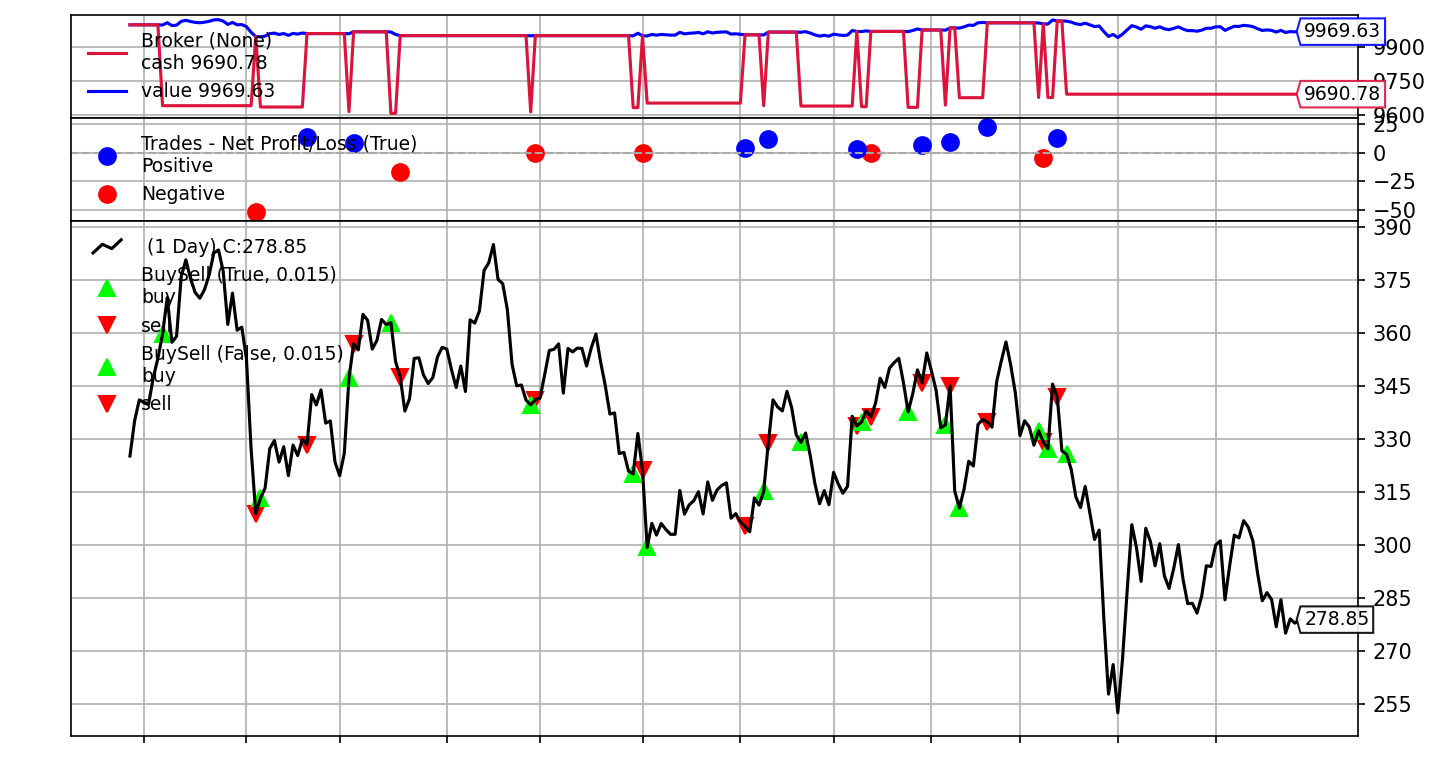

Starting Portfolio Value: 10000.000000
Final Portfolio Value: 9969.629579
PnL: -30.37


In [ ]:
#create trading strategy according backtrader's API
class MLSignal(bt.SignalStrategy):

    def log(self, txt, dt=None):

        ''' Logging function fot this strategy'''

        dt = dt or self.datas[0].datetime.date(0)

        print('%s, %s' % (dt.isoformat(), txt))


    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        self.signal = self.datas[0].Signal

        self.order = None


    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):

        self.log(' Close, %.2f' % self.dataclose[0])


        #Check if we are in the market
        if not self.position :

            if self.signal[0] == 1:

                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                #Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            #Already in the market...we might sell

            if self.signal[0] == -1:

                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                self.order = self.sell()

#initiate backtrader instance
cerebro = bt.Cerebro()

# Set our desired cash start

cerebro.broker.setcash(10000)

sigdata =Signal_PandasData(dataname=VARsignal)

cerebro.adddata(sigdata) #add data into backtrader

cerebro.addstrategy(MLSignal)  #add strategy

#Add observer
cerebro.addobserver(bt.observers.BuySell)

# Add commission rate of 0.25% per trade
cerebro.broker.setcommission(commission=0.0025)


start_portfolio_value = cerebro.broker.getvalue()
#start backtest engine
cerebro.run()
cerebro.plot(volume=False)  #decent plot
end_portfolio_value = cerebro.broker.getvalue()
pnl = end_portfolio_value - start_portfolio_value

print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
print(f'Final Portfolio Value: {end_portfolio_value:2f}')
print(f'PnL: {pnl:.2f}')